https://gisgeography.com/sentinel-2-bands-combinations/

Index | Band | Description
--- | --- | ---
0 | B2 | Blue
1 | B3 | Green
2 | B4 | Red
3 | B5 | Visible and Near Infrared (VNIR)
4 | B6 | VNIR
5 | B7 | VNIR
6 | B8 | VNIR
7 | B8A | VNIR
8 | B11 | Short Wave Infrared (SWIR)
9 | B12 | SWIR

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
X_train = pd.DataFrame(np.load('../data/X_train.npy'))
y_train = pd.DataFrame(np.load('../data/y_train.npy'))

In [7]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9
0,700,988,1228,1625,2307,2573,2578,2759,2212,1603
1,287,458,300,670,1817,2420,2631,2516,1086,582
2,317,670,274,1134,3980,4770,4942,4975,2168,941
3,437,570,221,178,104,106,102,92,62,70
4,711,1090,889,1913,3837,4473,4807,4941,3202,1772


In [8]:
y_train.head()

,0
0,2.69
1,15.89
2,2.72
3,2.57
4,12.93


In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34976 entries, 0 to 34975
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       34976 non-null  int16
 1   1       34976 non-null  int16
 2   2       34976 non-null  int16
 3   3       34976 non-null  int16
 4   4       34976 non-null  int16
 5   5       34976 non-null  int16
 6   6       34976 non-null  int16
 7   7       34976 non-null  int16
 8   8       34976 non-null  int16
 9   9       34976 non-null  int16
dtypes: int16(10)
memory usage: 683.3 KB


In [11]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9
count,34976.000000,34976.000000,34976.000000,34976.000000,34976.000000,34976.000000,34976.000000,34976.000000,34976.000000,34976.000000
mean,442.349754,668.212174,580.275475,1048.541800,2378.481873,2850.632491,2972.186271,3098.629946,1838.514438,1070.933326
std,258.013731,322.730541,451.003215,505.982596,901.004202,1088.798168,1165.003879,1177.891955,777.519974,588.571174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,275.000000,434.000000,262.000000,703.000000,2000.000000,2394.000000,2438.000000,2616.000000,1437.000000,688.000000
50%,374.000000,624.000000,407.000000,1031.000000,2539.000000,3025.000000,3166.000000,3310.000000,1928.000000,1004.000000
75%,555.000000,834.000000,783.000000,1352.000000,2923.000000,3531.000000,3728.000000,3838.000000,2355.000000,1423.000000
max,3936.000000,4284.000000,4296.000000,4441.000000,7387.000000,7573.000000,6740.000000,7521.000000,5264.000000,4947.000000


<Axes: >

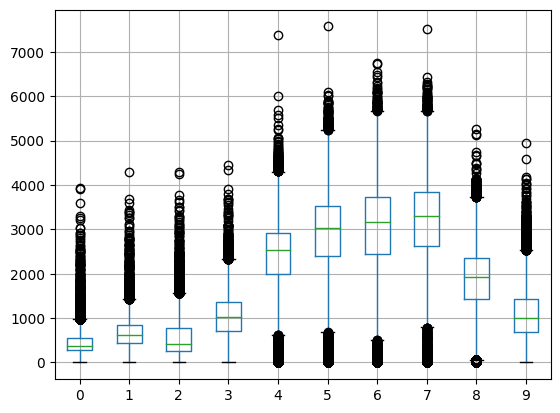

In [12]:
X_train.boxplot()

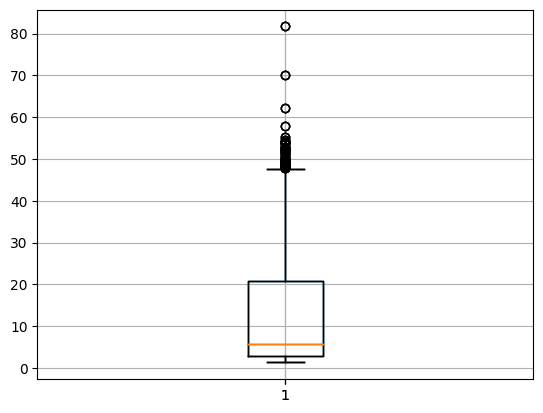

In [16]:
plt.boxplot(y_train)
plt.show()

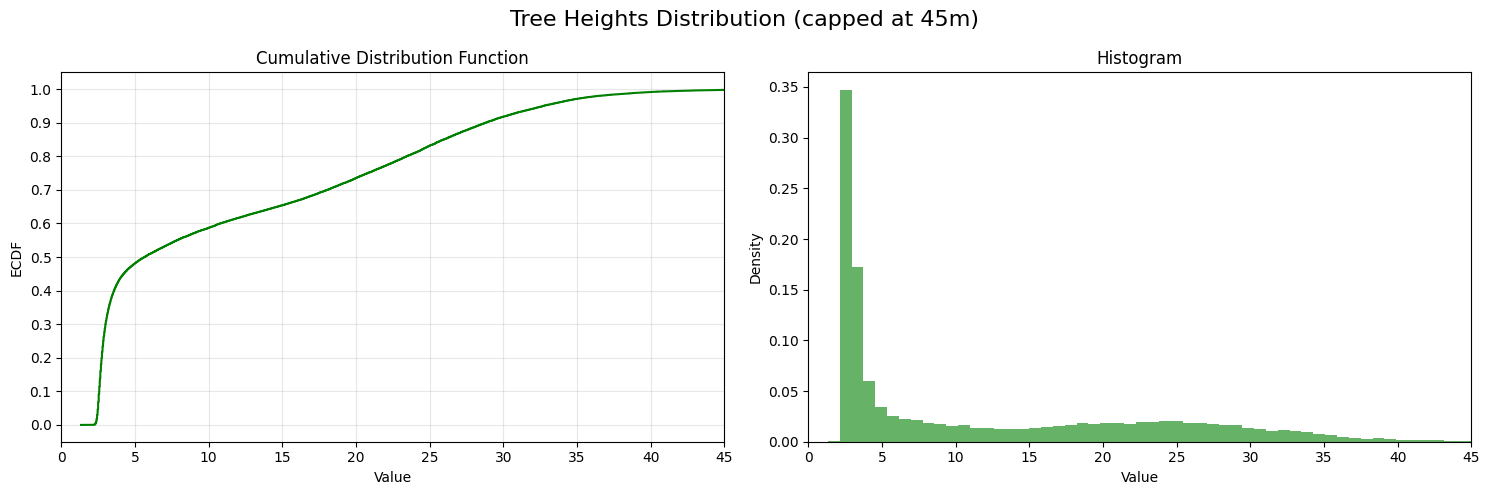

In [120]:
y_train = np.load('../data/y_train.npy')
y_train_sorted = np.sort(y_train)
y_cumulative = np.linspace(0., 1., len(y_train_sorted))

# Create a figure and specify the layout to have 1 row and 2 columns
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)  # Arguments are: nrows, ncols, index
plt.plot(y_train_sorted, y_cumulative, label='Tree Heights', color='g')
plt.title('Cumulative Distribution Function')
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 46, 5))
plt.xlim(0, 45)
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(y_train, bins=100, density=True, color='g', alpha=0.6, label='Histogram')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xlim(0, 45)

# Super title for the entire figure
fig.suptitle('Tree Heights Distribution (capped at 45m)', fontsize=16)

plt.tight_layout()
# Display the figure with the subplots
plt.show()

In [81]:
def plot_columns(df: pd.DataFrame, col_indices: list[int]):
    """Plot histograms of columns given by col_indices"""

    plt.figure(figsize=(10, 5))
    num_cols = len(col_indices)
    colors = plt.cm.viridis(np.linspace(0, 1, num_cols))

    # Loop over each column index and plot a histogram
    for i, col_index in enumerate(col_indices):
        plt.hist(df.iloc[:, col_index], bins=50, density=True, alpha=0.3, color=colors[i], label=f'Column {col_index}')

    plt.title(f"Histograms for Bands {col_indices}")
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

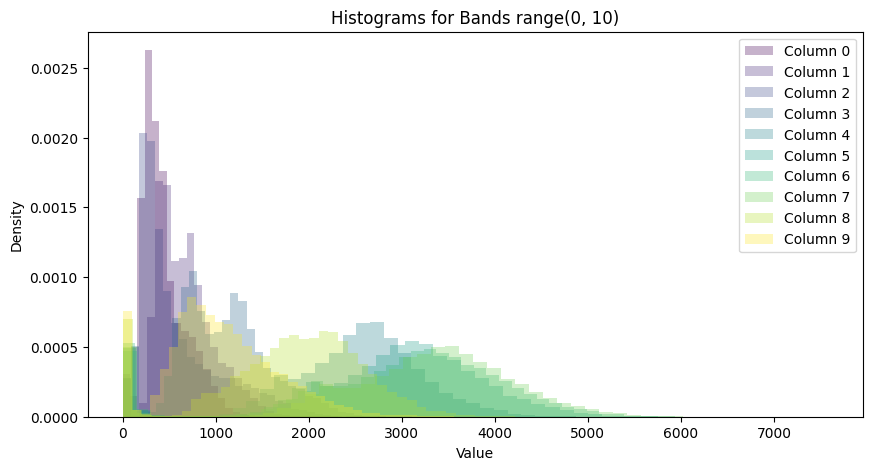

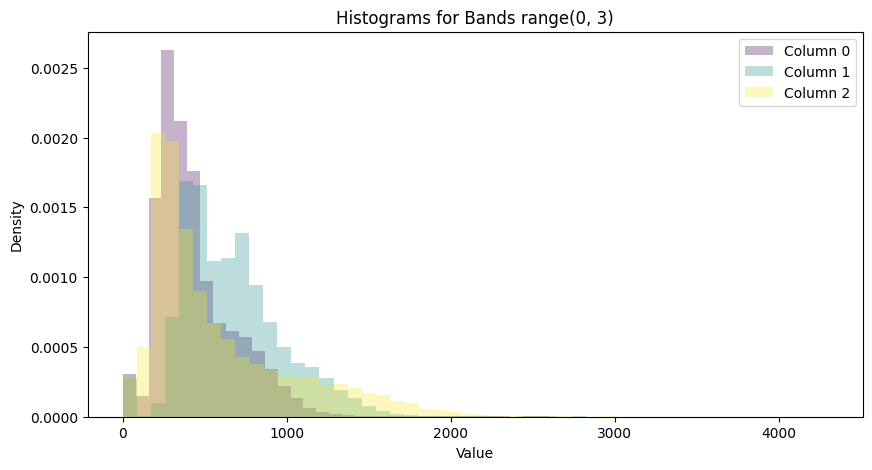

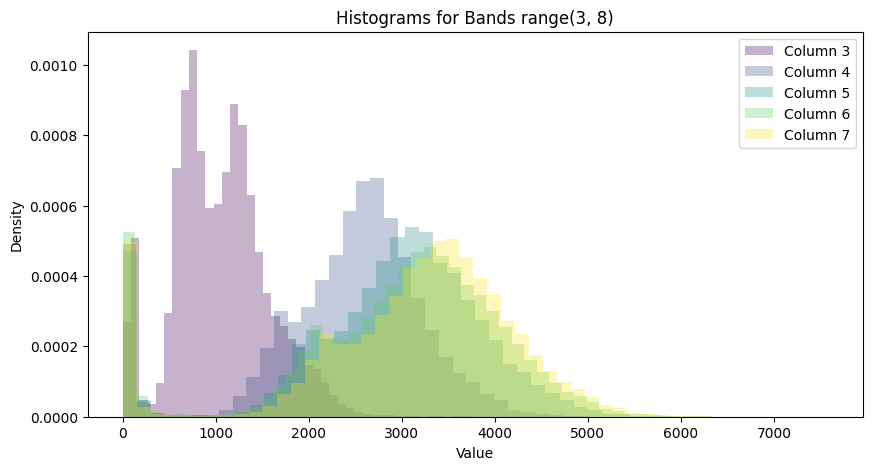

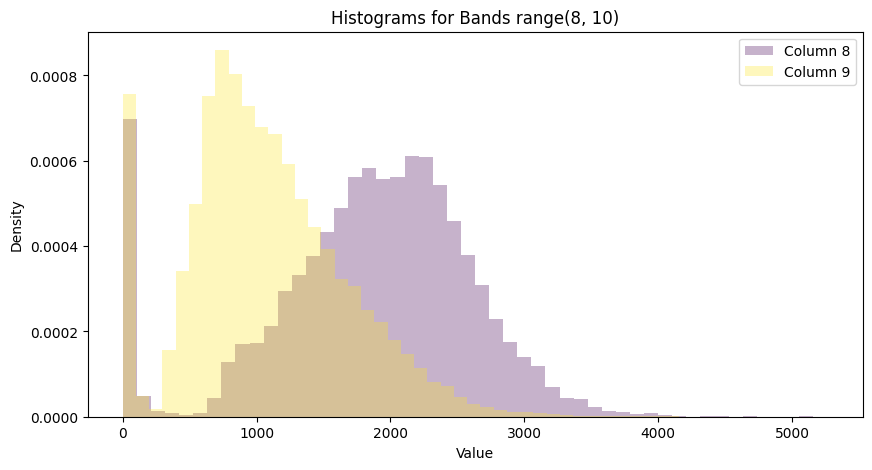

In [84]:
plot_columns(X_train, range(10))
plot_columns(X_train, range(0, 3))
plot_columns(X_train, range(3, 8))
plot_columns(X_train, range(8, 10))